In [1]:
import numpy as np

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

sent = ["휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.", "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니 다."]
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent) # 문장 벡터화! (fit_transform의 인자로 들어가는 문장s는 sequence data로 묶여있기만 하면 됨!)

idf = tfidf_vectorizer.idf_
print(dict(zip(tfidf_vectorizer.get_feature_names(), idf)))

{'갑작스런': 1.4054651081081644, '내일': 1.4054651081081644, '놀러왔다가': 1.4054651081081644, '망연자실': 1.4054651081081644, '반가운': 1.4054651081081644, '서쪽': 1.4054651081081644, '소식': 1.4054651081081644, '오늘': 1.4054651081081644, '으로': 1.4054651081081644, '이어졌는데요': 1.4054651081081644, '인해': 1.4054651081081644, '있습니': 1.4054651081081644, '있습니다': 1.4054651081081644, '중심': 1.4054651081081644, '폭염': 1.0, '피해서': 1.4054651081081644, '하고': 1.4054651081081644, '휴일': 1.0}


In [8]:
idf # 어떻게 계산된거지...

array([1.40546511, 1.40546511, 1.40546511, 1.40546511, 1.40546511,
       1.40546511, 1.40546511, 1.40546511, 1.40546511, 1.40546511,
       1.40546511, 1.40546511, 1.40546511, 1.40546511, 1.        ,
       1.40546511, 1.40546511, 1.        ])

In [7]:
print(tfidf_matrix[0]) # 어떻게 계산된거지.......
print(tfidf_vectorizer.vocabulary_)

  (0, 12)	0.3160304990863645
  (0, 6)	0.3160304990863645
  (0, 4)	0.3160304990863645
  (0, 1)	0.3160304990863645
  (0, 9)	0.3160304990863645
  (0, 14)	0.22485830296545706
  (0, 8)	0.3160304990863645
  (0, 13)	0.3160304990863645
  (0, 5)	0.3160304990863645
  (0, 7)	0.3160304990863645
  (0, 17)	0.22485830296545706
{'휴일': 17, '오늘': 7, '서쪽': 5, '중심': 13, '으로': 8, '폭염': 14, '이어졌는데요': 9, '내일': 1, '반가운': 4, '소식': 6, '있습니다': 12, '피해서': 15, '놀러왔다가': 2, '갑작스런': 0, '인해': 10, '망연자실': 3, '하고': 16, '있습니': 11}


In [15]:
idf.shape # 이 idf가 벡터화한 값이 될 것...

(18,)

In [16]:
len(tfidf_vectorizer.vocabulary_) # char 하나짜리는 안 데려오네!?

18

### 자카드 유사도
두 sequence data(문장)의 원소의 교집합 원소 개수 / 전체 합집합 원소 개수

In [17]:
from sklearn.metrics import jaccard_score

# jaccard_score(tfidf_matrix[0:1], tfidf_matrix[1:2]) -> 행끼리의 유사도 (행이 한 문장!) 문장 유사도.
jaccard_score(np.array([1,1,0,0]), np.array([1,1,0,2]), average = None)
# 아 이게 사실상 y_true, y_pred 를 넣는 방식이라, 1, 0, 2를 각각 클래스로 인지!! 출력 결과는 차례로 0,1,2 class에 대한 건가

array([0.5, 1. , 0. ])

In [23]:
tfidf_matrix[0:1]

<1x18 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [27]:
len(sent[0])

55

In [28]:
jaccard_score(sent[0], sent[1]) 
# ValueError: Found input variables with inconsistent numbers of samples: [55, 46]
# 둘의 원소의 개수가 다르면 안되는겨? true/pred를 집어넣는 거라...?

ValueError: Found input variables with inconsistent numbers of samples: [55, 46]

In [24]:
jaccard_score(tfidf_matrix[0:1], tfidf_matrix[1:2]) # 왜 안 되냐!

TypeError: len() of unsized object

### 코사인 유사도

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

print(cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2]))
print(cosine_similarity(tfidf_matrix[0], tfidf_matrix[1]))
# 둘이 같음 

[[0.11304078]]
[[0.11304078]]


### 유클리디안 유사도

In [34]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances(tfidf_matrix[0], tfidf_matrix[1])



array([[1.33188529]])

In [35]:
# 정규화
import numpy as np

def l1_normalize(v):
    norm = np.sum(v)
    return v/norm

tfidf_norm_l1 = l1_normalize(tfidf_matrix)
euclidean_distances(tfidf_norm_l1[0], tfidf_norm_l1[1])

array([[0.21243357]])

### 맨하탄 유사도

In [36]:
from sklearn.metrics.pairwise import manhattan_distances

manhattan_distances(tfidf_matrix[0], tfidf_matrix[1])

array([[5.37022233]])

In [37]:
normalized = l1_normalize(tfidf_matrix)
manhattan_distances(normalized[0], normalized[1])

array([[0.85654185]])

In [38]:
# 거리 측정법에 따라 유사도가 매우 달라짐! 어떤 측정법이 적절할지 정확하게 이해하고 사용하기!!

## EDA 실습
영화리뷰 데이터

### 데이터 불러오기

In [3]:
import os

import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils


In [4]:
data_set = tf.keras.utils.get_file(
fname = "imdb.tar.gz",
origin = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
extract = True)

84131840/84125825 [==============================] - 27s 0us/step


In [10]:
# 텍스트 파일들로부터 리뷰 텍스트/해당 라벨값 가져오는 함수를 각각 만들자!

# 리뷰 텍스트 가져오는 함수
def directory_data(directory): # 디렉토리를 인자로 받음
    data = {} # 빈 딕셔너리 생성
    data['review'] = [] # 딕셔너리에 review 추가 (key: 'review')
    for file_path in os.listdir(directory): # 해당 디렉토리의 파일들 하나하나 돌면서
        with open(os.path.join(directory,file_path), 'r', encoding = 'utf-8') as file:
            data['review'].append(file.read()) # data 딕셔너리의 'review' 리스트의 원소로 그 파일 내용을 담음
    return pd.DataFrame.from_dict(data) # from_dict는 어떻게 작동하징?

In [7]:
# 리뷰에 해당하는 라벨값 가져오는 함수
def data(directory):
    pos_df = directory_data(os.path.join(directory,"pos")) # 해당 디렉토리의 pos 폴더
    neg_df = directory_data(os.path.join(directory, "neg"))
    pos_df['sentiment'] = 1
    neg_df['sentiment'] = 0
    
    return pd.concat([pos_df, neg_df])

In [11]:
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

In [12]:
train_df.head()

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [15]:
reviews = list(train_df['review'])
# 각 문장(리뷰)을 리스트로 담고 있음. 
# 단어를 토크나이징하고, 문장마다 토크나이징된 단어의 수를 저장하고, 그 단어들을 붙여 알파벳의 전체 개수를 저장하는 부분을 만들어보자


### 데이터 분석

In [16]:
# 문자열 문장 리스트를 토크나이징
tokenized_reviews = [r.split() for r in reviews] # 각 review를 space 기준으로 split

# 토크나이징된 리스트에 대한 각 길이를 저장 <단어 수>
review_len_by_token = [len(t) for  t in tokenized_reviews] # 각 review에 들어있는 token 수

# 토크나이징된 것을 붙여 음절의 길이를 저장 <알파벳 수>
review_len_by_eumjeol = [len(s.replace(' ','')) for s in reviews] # s는 한 review에 해당하는 str. 


Text(0, 0.5, 'Number of Reviews')

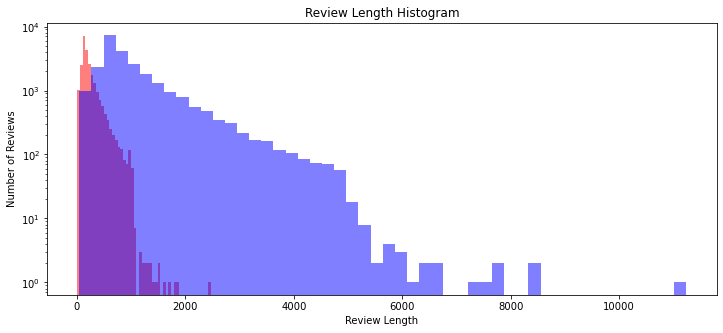

In [17]:
import matplotlib.pyplot as plt

# 히스토그램으로 문장을 구성하는 단어 개수와 알파벳 개수 알아보기

# 그래프에 대한 이미지 크기 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize = (12,5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨

plt.hist(review_len_by_token, bins = 50, alpha = 0.5, color = 'r', label = 'word')
plt.hist(review_len_by_eumjeol, bins = 50, alpha = 0.5, color = 'b', label = 'alphabet')
plt.yscale('log', nonposy='clip')

# 그래프 제목
plt.title('Review Length Histogram')
# 그래프 x 축 라벨
plt.xlabel('Review Length')
# 그래프 y 축 라벨
plt.ylabel('Number of Reviews')


In [18]:
# 데이터 분포를 통계치로 수치화하기

import numpy as np

print('문장 최대 길이: {}'.format(np.max(review_len_by_token)))
print('문장 최소 길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균 길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간 길이: {}'.format(np.median(review_len_by_token)))
# 사분위
print('제 1사분위 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제 3사분위 길이: {}'.format(np.percentile(review_len_by_token, 75)))

문장 최대 길이: 2470
문장 최소 길이: 10
문장 평균 길이: 233.79
문장 길이 표준편차: 173.73
문장 중간 길이: 174.0
제 1사분위 길이: 127.0
제 3사분위 길이: 284.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1c4ff7a1be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c4ff7a9320>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c4ff7a18d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c4ff7a9a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c4ff7b9128>],
 'means': [<matplotlib.lines.Line2D at 0x1c4ff7a9da0>]}

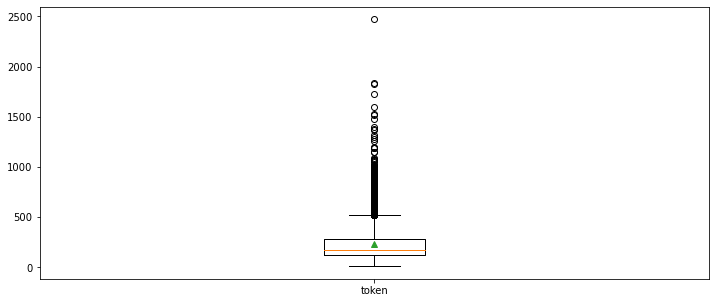

In [19]:
# 박스플롯으로 데이터 시각화.
# 문장 내 단어수, 알파벳 개수를 각각 따로 박스플롯으로 만들기

plt.figure(figsize = (12,5))

# 첫번째 인자: 여러 분포에 대한 데이터 리스트 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함
plt.boxplot([review_len_by_token], labels = ['token'], showmeans = True)
# labels = ['token'] 이게 어케 가능? 아 그냥 데이터 이름(?)이 token이라고....!? ㅇㅋ




{'whiskers': [<matplotlib.lines.Line2D at 0x1c4ff81d8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c4ff81dfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c4ff81d5c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c4ff829710>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c4ff829dd8>],
 'means': [<matplotlib.lines.Line2D at 0x1c4ff829a90>]}

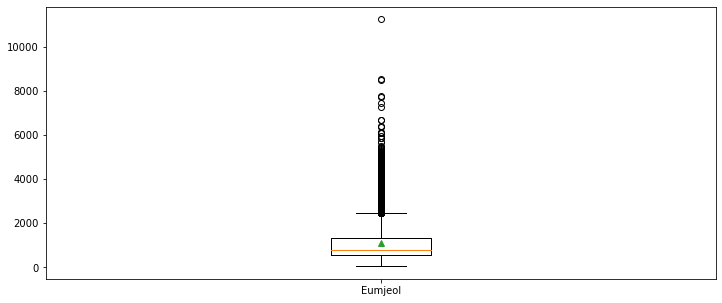

In [20]:
# 문장의 알파벳 개수 나타내는 박스플롯
plt.figure(figsize =(12,5))
plt.boxplot([review_len_by_eumjeol], labels = ['Eumjeol'], showmeans=True)


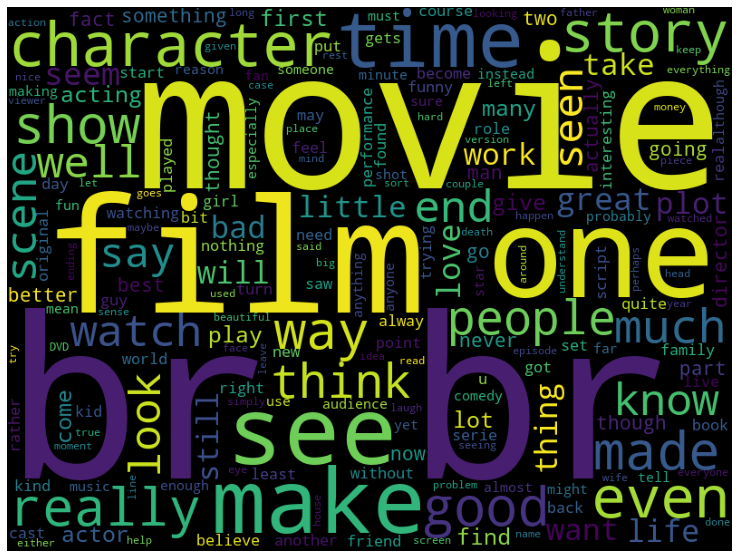

In [21]:
# 워드 클라우드

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 800, height = 600).generate(' '.join(train_df['review'])) # 하나의 문자열로 만들어서 넣어준 인자로 generate 해야하나봐!

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

c:\programdata\anaconda3\envs\pr_tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


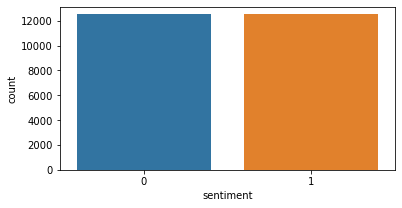

In [22]:
# 긍정 부정 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
fig, axe = plt.subplots(ncols = 1)
fig.set_size_inches(6,3)
sns.countplot(train_df['sentiment'])
# 데이터 균형이 매우 좋은 편이라는 것 확인 가능 (부정 개수 = 긍정 개수)